In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
import data_set
import clustering
import fit_to_external_classification
import predict_nuber_of_clusters

In [114]:
from importlib import reload

reload(data_set)
reload(clustering)
reload(predict_nuber_of_clusters)
reload(fit_to_external_classification)

<module 'fit_to_external_classification' from '/home/davidross/Documents/Unsupervised/classification-master/fit_to_external_classification.py'>

In [4]:
data_set_number = 2

In [5]:
dataset = data_set.prepare_data_set1()

Target


/home/davidross/Documents/Unsupervised/classification-master/data_set.py:20: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  data = pd.merge(echonest_audio_features,tracks.iloc[:,tracks.columns.get_level_values(1).isin(["genre_top"])],how = "left",left_index = True , right_index = True)


In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=dataset.drop('Target', axis=1))
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

In [6]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(dataset.drop('Target', axis=1))

/tmp/ipykernel_5437/3850962857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)


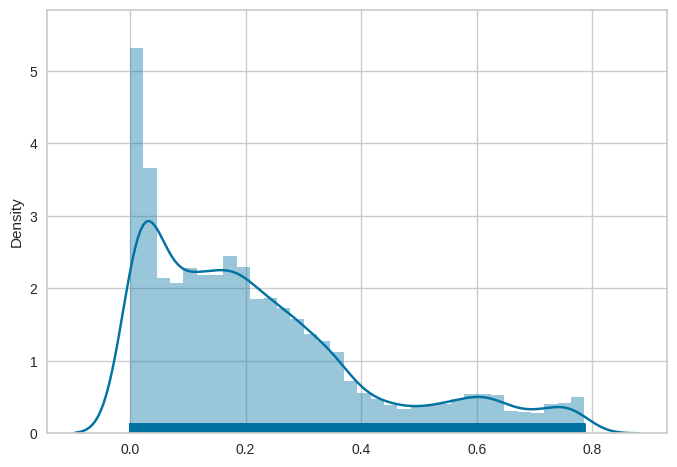

In [86]:
import seaborn as sns

sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)
plt.savefig('distplot.png')

In [10]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]

In [24]:
points = np.asarray(dataset.drop('Target', axis=1))

In [25]:
from sklearn.manifold import TSNE

points_red = TSNE(n_components=2).fit_transform(points)

/home/davidross/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/davidross/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
points = scaler.fit_transform(points)
points_red = scaler.fit_transform(points_red)

In [27]:
reg_points = []
anomalous_points = []

reg_points_red = []
anomalous_points_red = []

for i in range(0, len(points)):
    if i in outliers:
        anomalous_points.append(points[i])
        anomalous_points_red.append(points_red[i])
    else: 
        reg_points.append(points[i])
        reg_points_red.append(points_red[i])
        
reg_points = np.asarray(reg_points)
anomalous_points = np.asarray(anomalous_points)

reg_points_red = np.asarray(reg_points_red)
anomalous_points_red = np.asarray(anomalous_points_red)
# print('anomalous: ', anomalous_points, len(anomalous_points))
# print('reg: ', reg_points, len(reg_points))
    
np.savetxt("dataset1_is_anomaly.csv", outliers, delimiter=",")

np.savetxt("dataset1_all_points.csv", points, delimiter=",")
np.savetxt("dataset1_reg_points.csv", reg_points, delimiter=",")
np.savetxt("dataset1_anomalous_points.csv", anomalous_points, delimiter=",")

np.savetxt("dataset1_all_points_red.csv", points_red, delimiter=",")
np.savetxt("dataset1_reg_points_red.csv", reg_points_red, delimiter=",")
np.savetxt("dataset1_anomalous_points_red.csv", anomalous_points_red, delimiter=",")

In [28]:
reg_points = np.genfromtxt("dataset1_reg_points.csv", delimiter=',')
reg_points_red = np.genfromtxt("dataset1_reg_points_red.csv", delimiter=',')
print('len of reg ', len(reg_points))

anomalous_points = np.genfromtxt("dataset1_anomalous_points.csv", delimiter=",")
anomalous_points_red = np.genfromtxt("dataset1_anomalous_points_red.csv", delimiter=",")
print('len of anomalous ', len(anomalous_points))

points = np.genfromtxt("dataset1_all_points.csv", delimiter=",")
points_red = np.genfromtxt("dataset1_all_points_red.csv", delimiter=",")

is_anomaly = np.genfromtxt("dataset1_is_anomaly.csv", delimiter=",")

len of reg  8419
len of anomalous  936


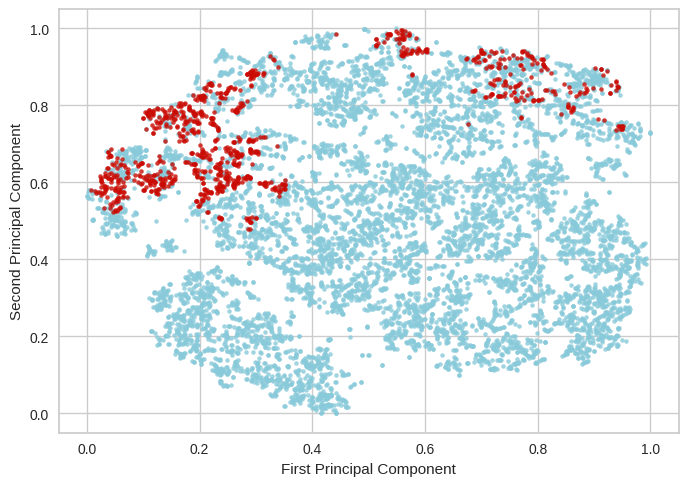

In [87]:
 # plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax.scatter(reg_points_red[:, 0], reg_points_red[:, 1], c='c', alpha=0.8, s=8)
plt.scatter(anomalous_points_red[:, 0], anomalous_points_red[:, 1], c='r', alpha=0.8, s=8)
plt.savefig('tsne_1.png')
plt.show()

real unique labels [ 0  1  2  3  4  5  6  7  8  9 10 11] 9355


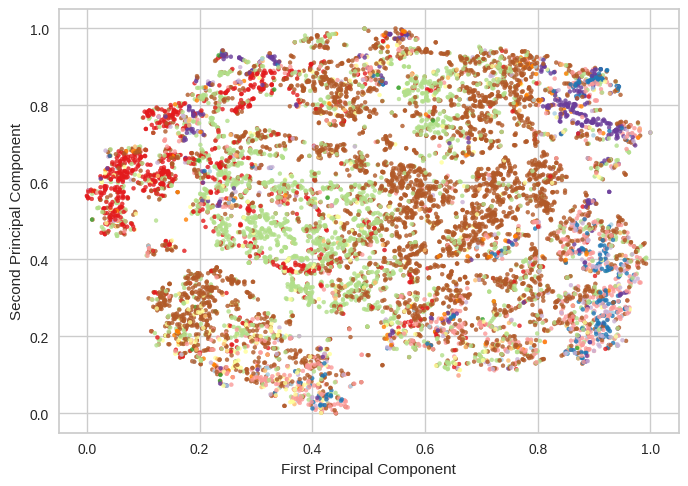

In [88]:
labels = list(dataset['Target'])
fit_to_external_classification.plot_external_tag_distribution(data_set_number, points_red, labels)

In [32]:
for i in sorted(outliers, reverse=True):
    del labels[i]

For n_clusters = 2 The average silhouette_score is : 0.3506059121255081
For n_clusters = 3 The average silhouette_score is : 0.39853177781001287
For n_clusters = 4 The average silhouette_score is : 0.38462022162597337
For n_clusters = 5 The average silhouette_score is : 0.3880793191586406
For n_clusters = 6 The average silhouette_score is : 0.40074334445878196
For n_clusters = 7 The average silhouette_score is : 0.395615473195727


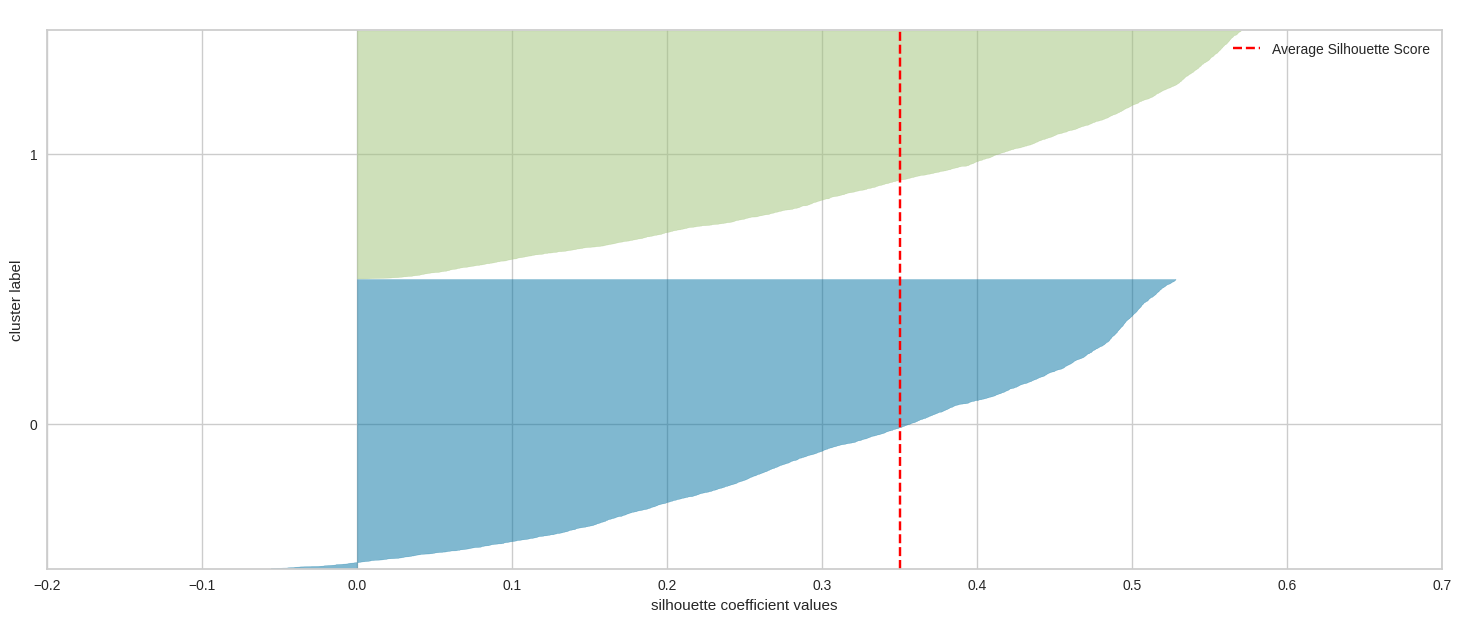

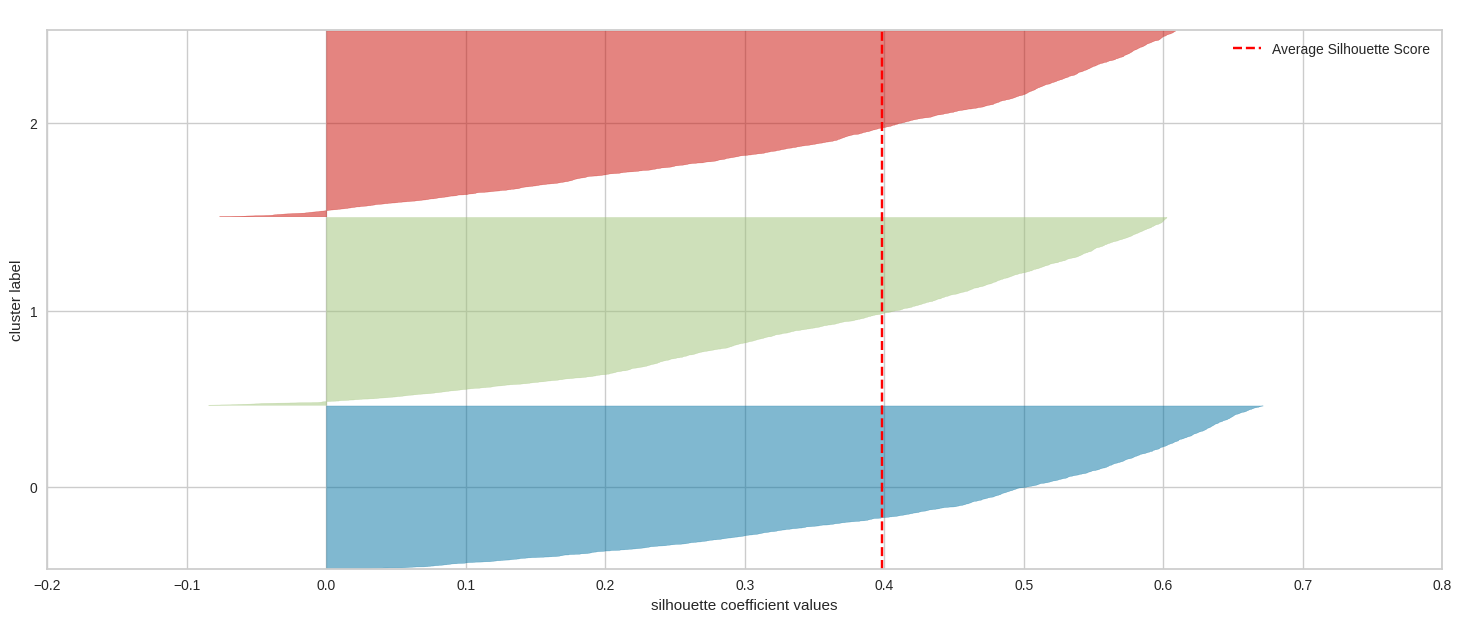

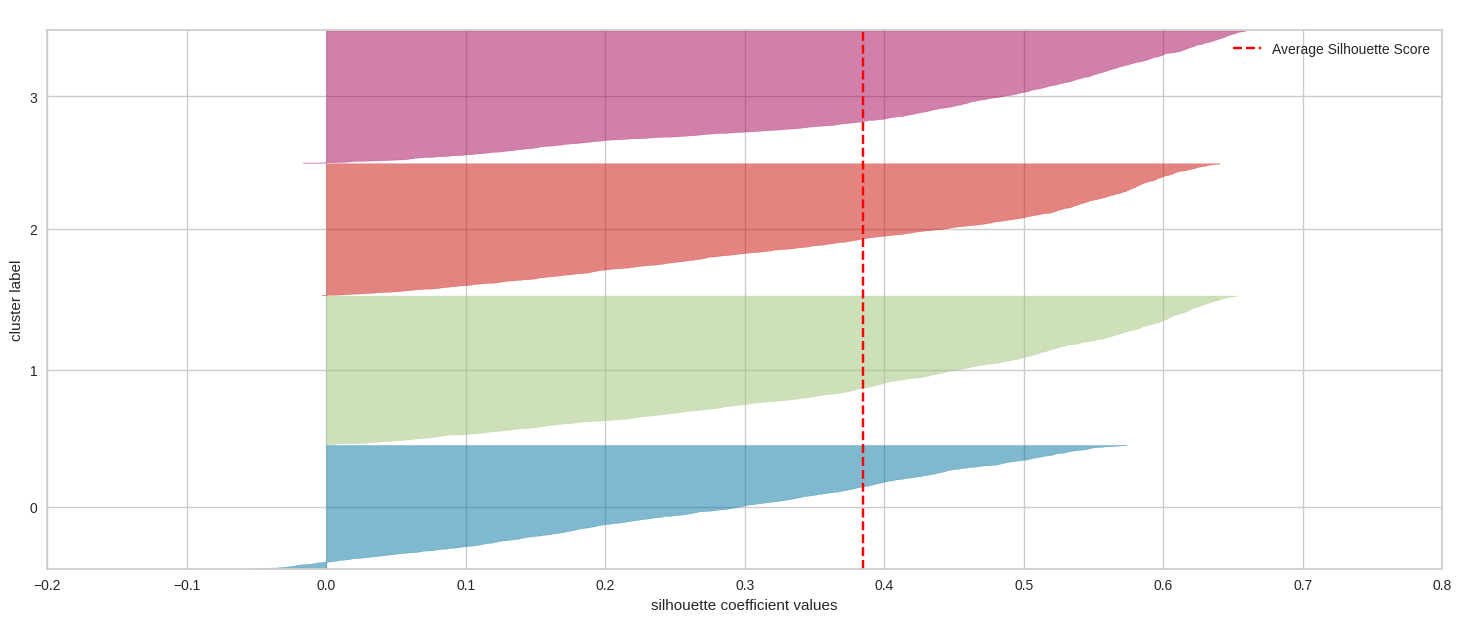

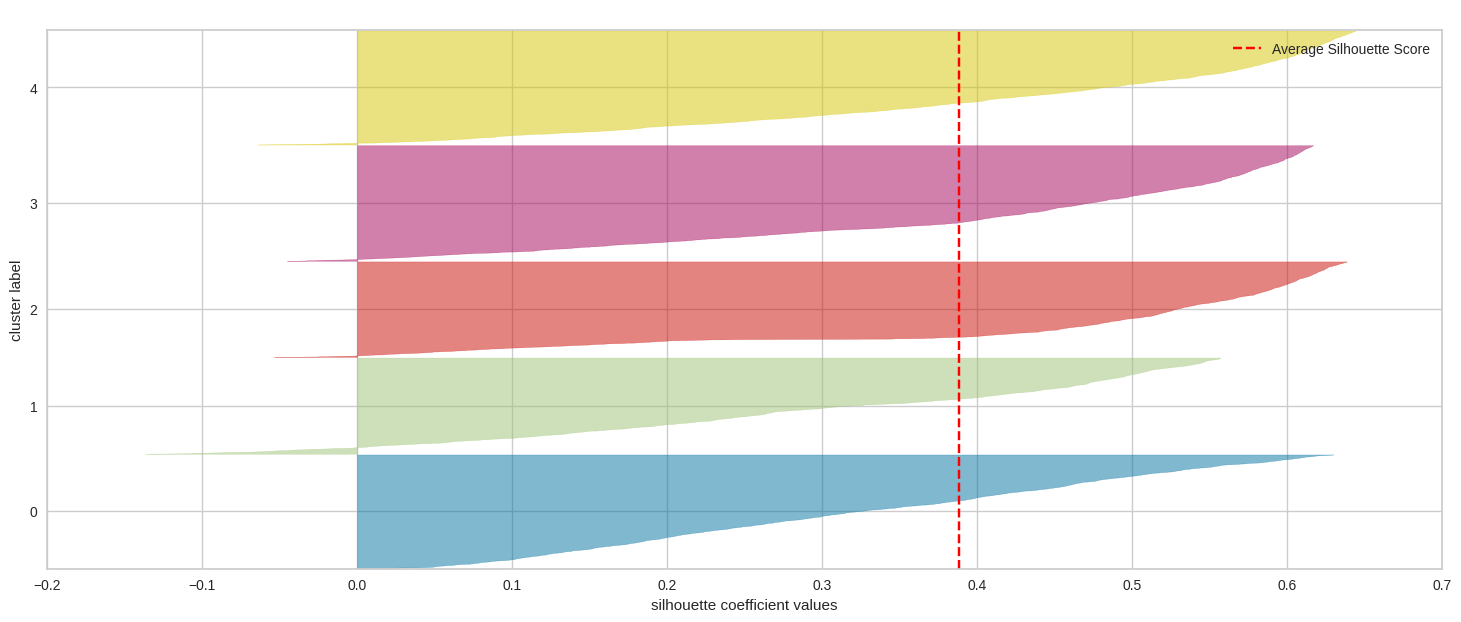

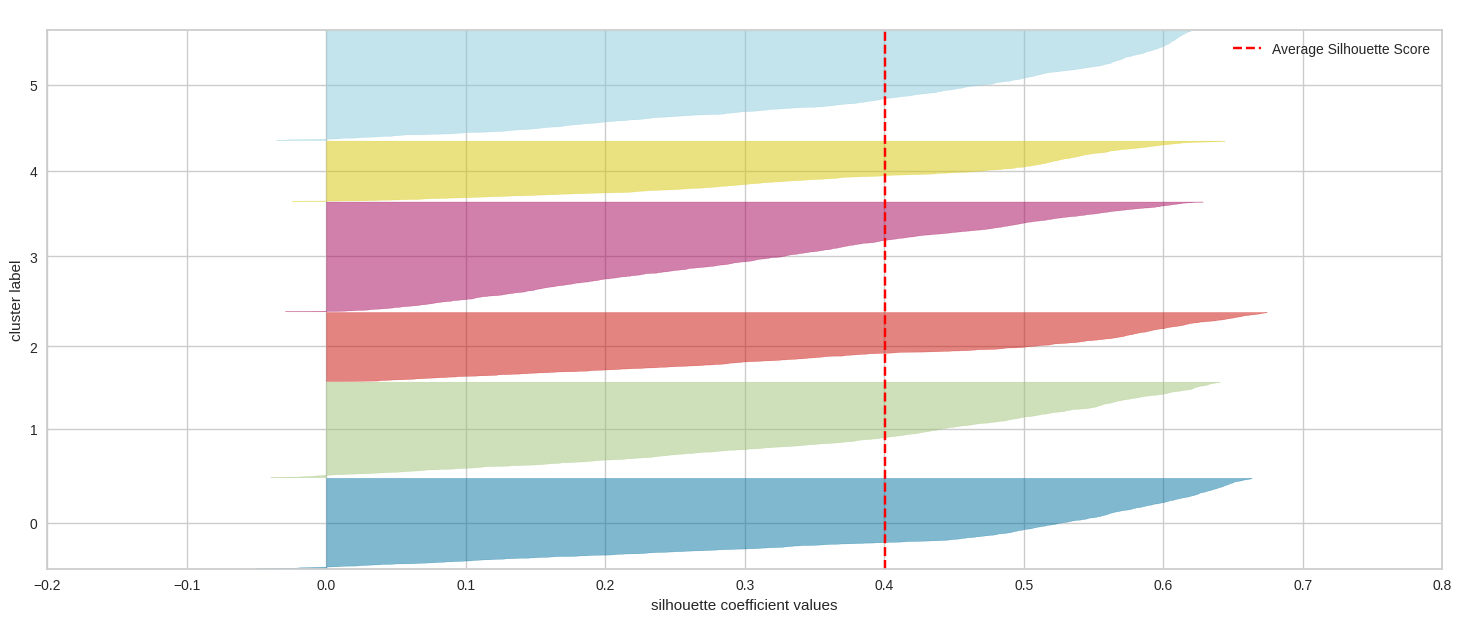

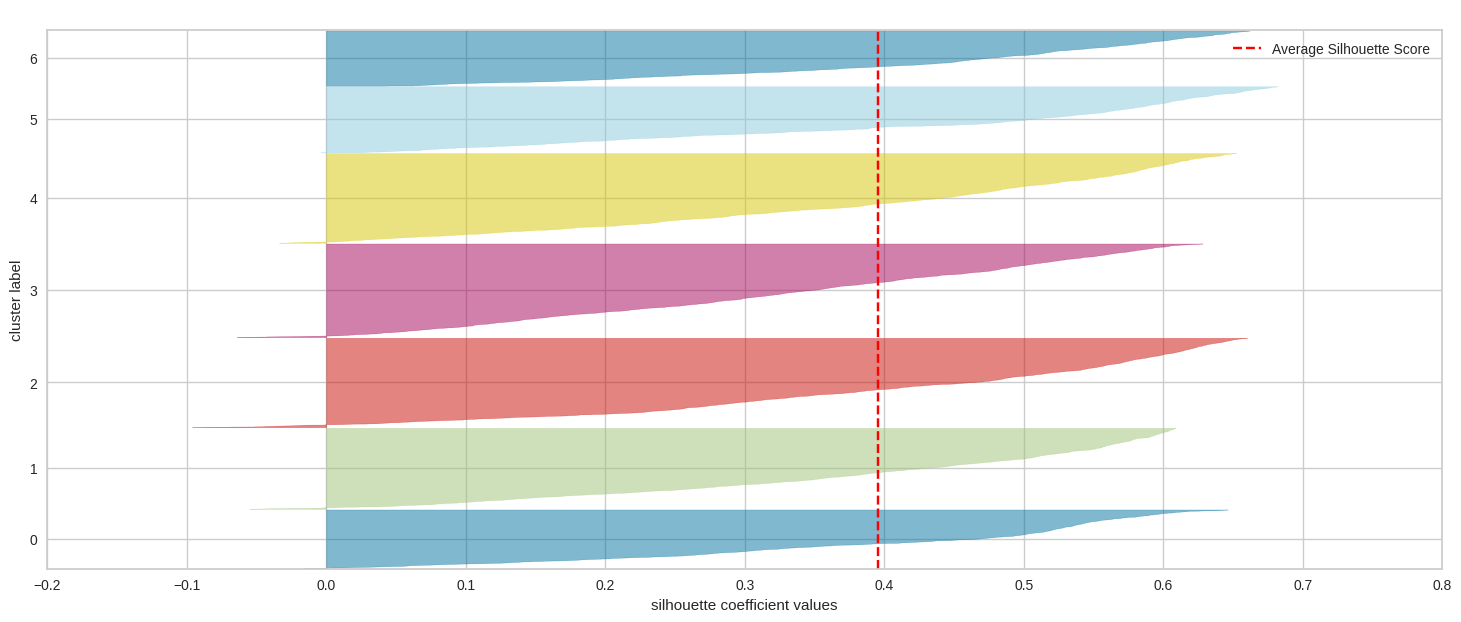

In [89]:
predict_nuber_of_clusters.perform_silhouette_method(reg_points_red, 'K means')

For n_clusters = 2 The average silhouette_score is : 0.3416059425557486
For n_clusters = 3 The average silhouette_score is : 0.3941304402232672
For n_clusters = 4 The average silhouette_score is : 0.38455268194645453
For n_clusters = 5 The average silhouette_score is : 0.3741638826583723
For n_clusters = 6 The average silhouette_score is : 0.3943874083333842
For n_clusters = 7 The average silhouette_score is : 0.3894507928650686


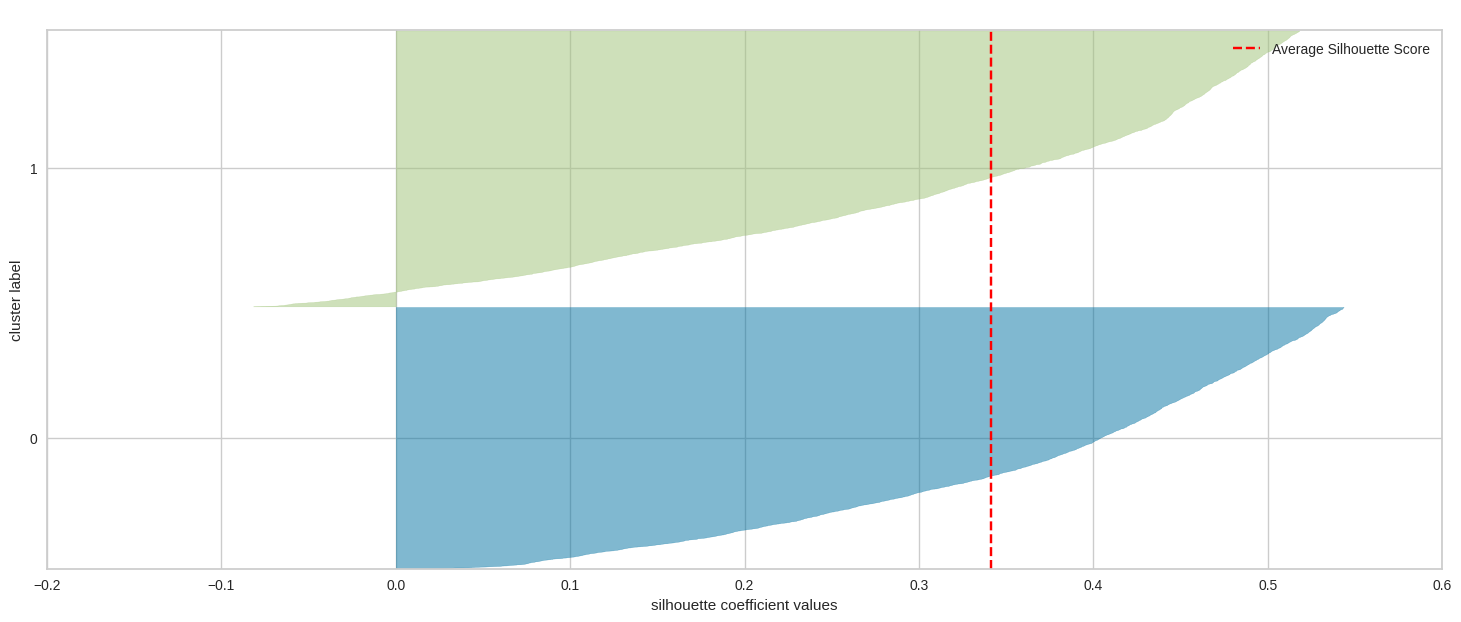

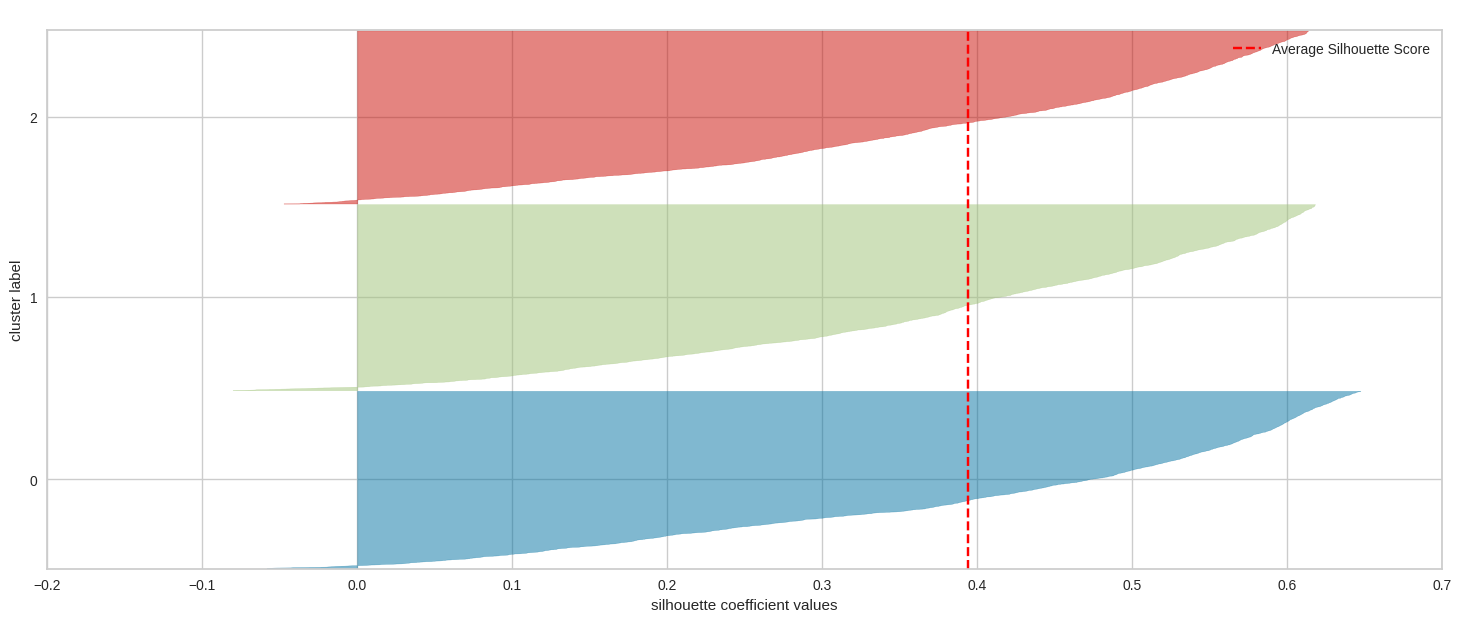

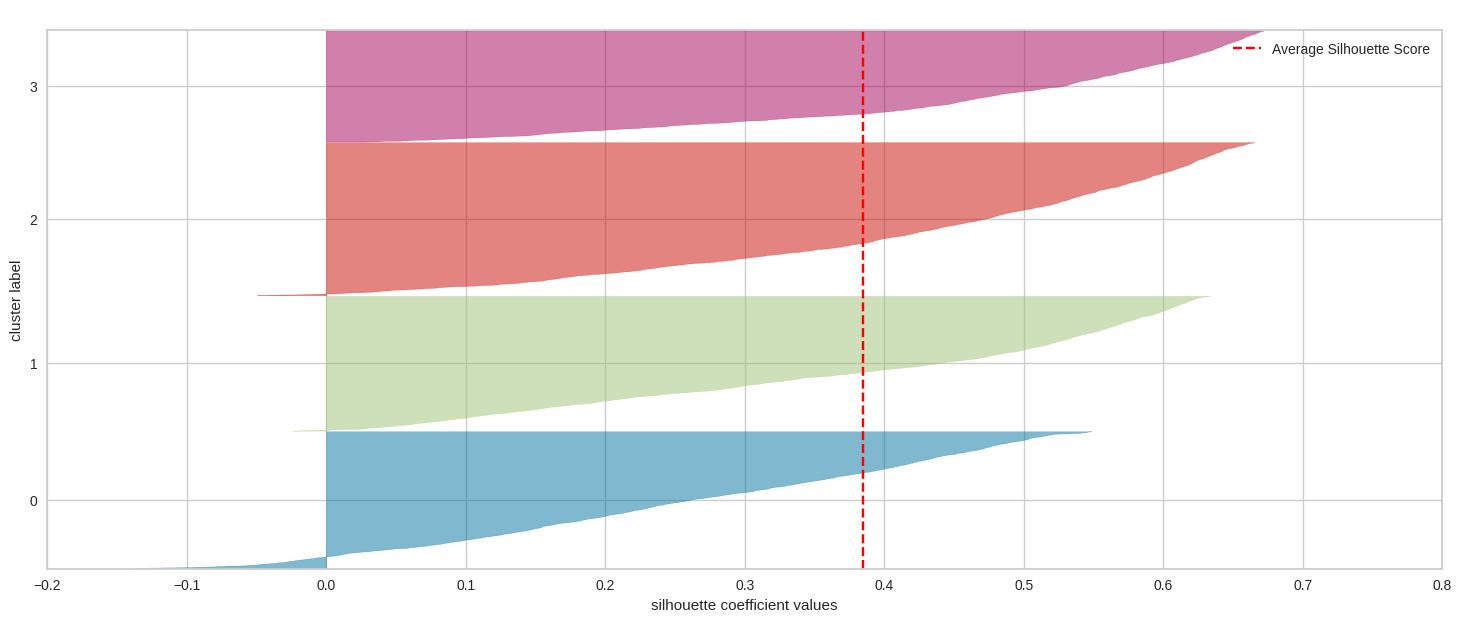

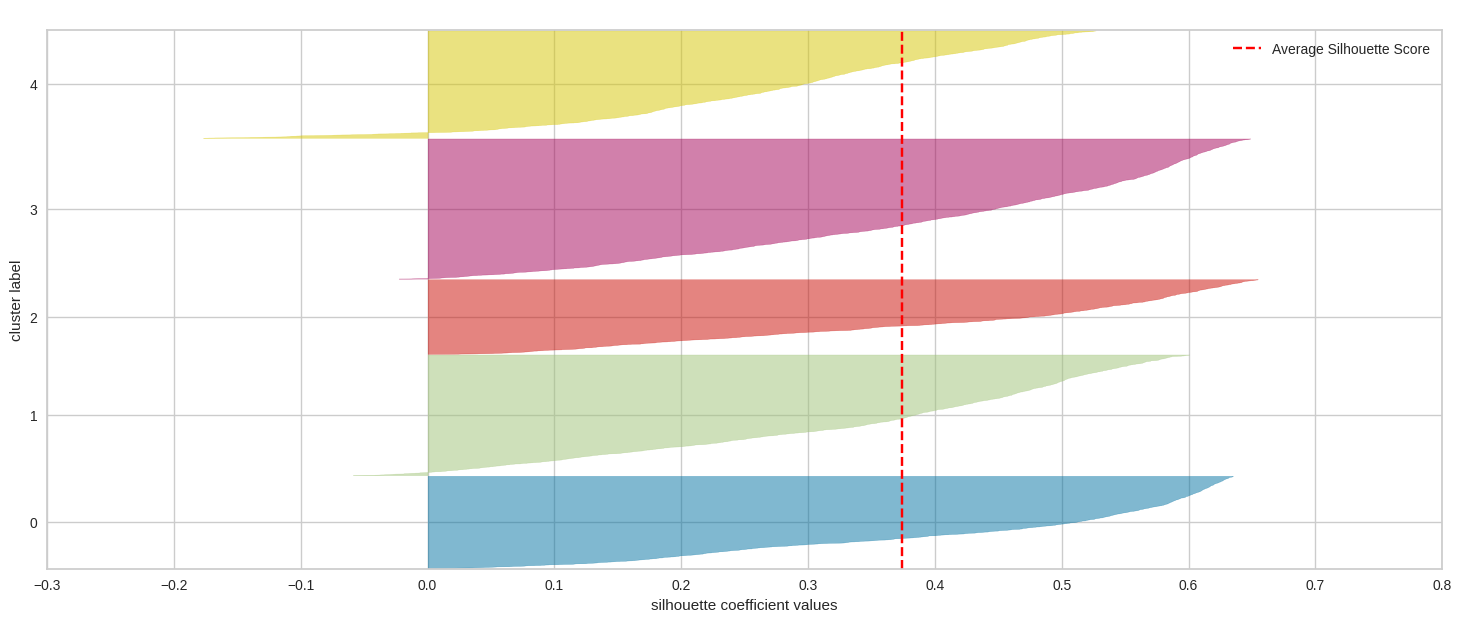

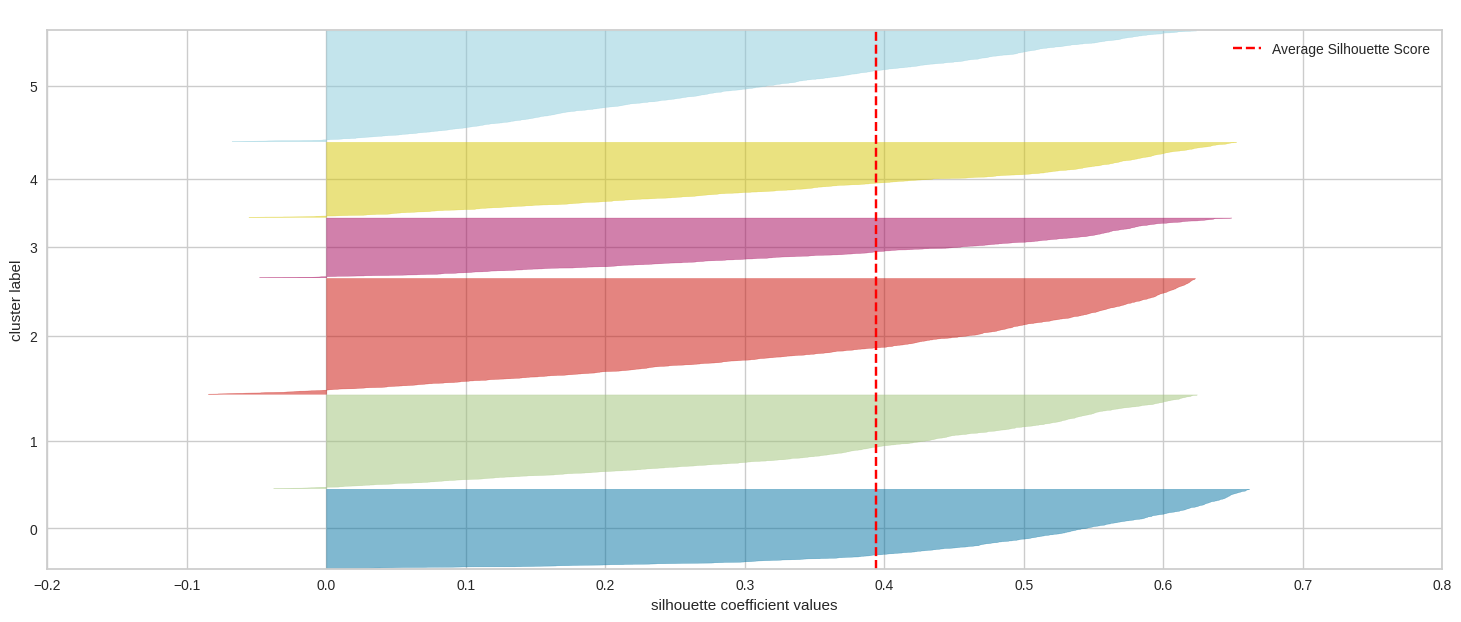

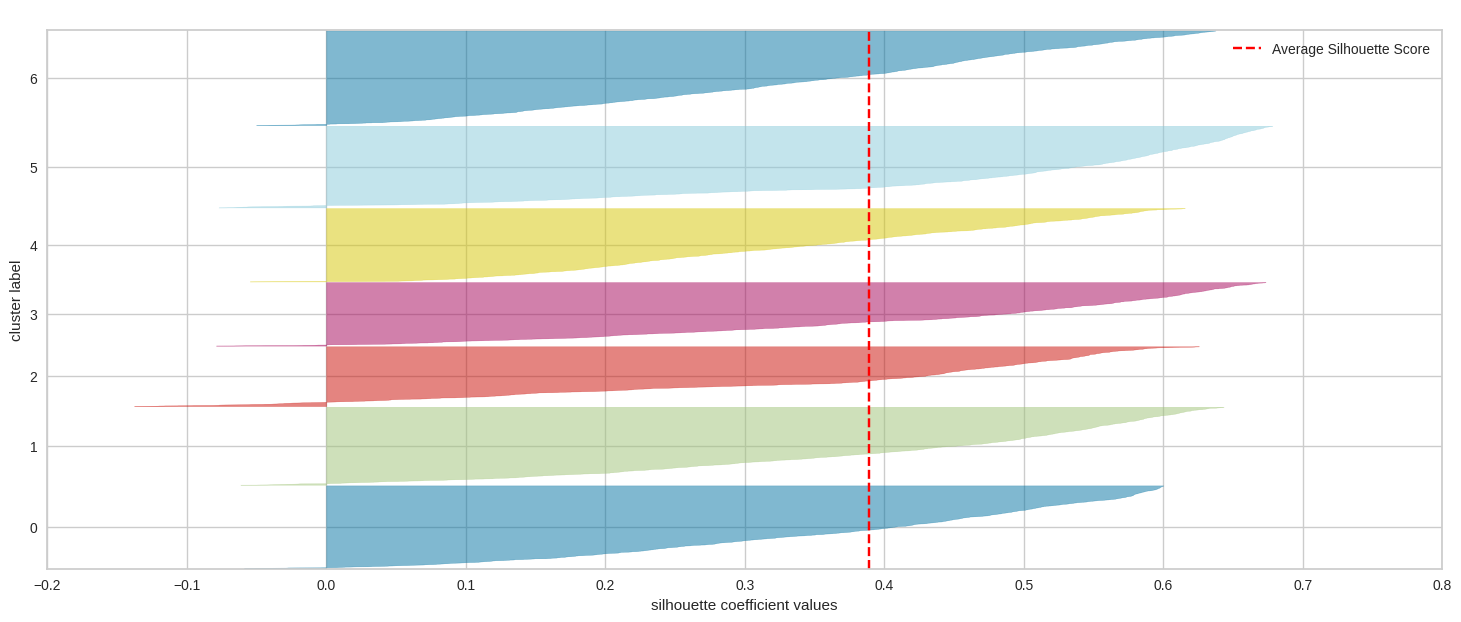

In [90]:
predict_nuber_of_clusters.perform_silhouette_method(reg_points_red, 'MiniBatchKMeans')

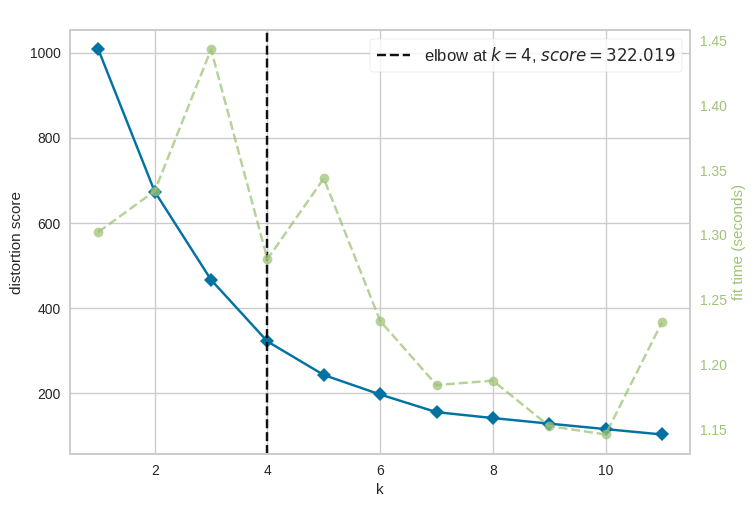

In [37]:
predict_nuber_of_clusters.perform_elbow_method(reg_points_red, 'Hierarchical')

In [62]:
methods = ['K means', 'KMeansMiniBatch', 'Hierarchical']
for method in methods:
    predict_nuber_of_clusters.compare_silhouette_scores(reg_points_red, method)

for K means    :  3 clusters are better than 2 clusters, with p value = 3.373924868679957e-08  <<0.05
for K means    :  3 clusters are better than 4 clusters, with p value = 2.4610627764174105e-08  <<0.05
for K means    :  3 clusters are better than 5 clusters, with p value = 3.38823691698822e-08  <<0.05
for K means    :  3 clusters are better than 7 clusters, with p value = 3.383460383922705e-08  <<0.05
for K means    :  4 clusters are better than 2 clusters, with p value = 2.4574464723046132e-08  <<0.05
for K means    :  5 clusters are better than 2 clusters, with p value = 3.383460383922705e-08  <<0.05
for K means    :  5 clusters are better than 4 clusters, with p value = 2.4683093013112146e-08  <<0.05
for K means    :  6 clusters are better than 2 clusters, with p value = 3.317200684107236e-08  <<0.05
for K means    :  6 clusters are better than 3 clusters, with p value = 3.321895830209886e-08  <<0.05
for K means    :  6 clusters are better than 4 clusters, with p value = 2.417971

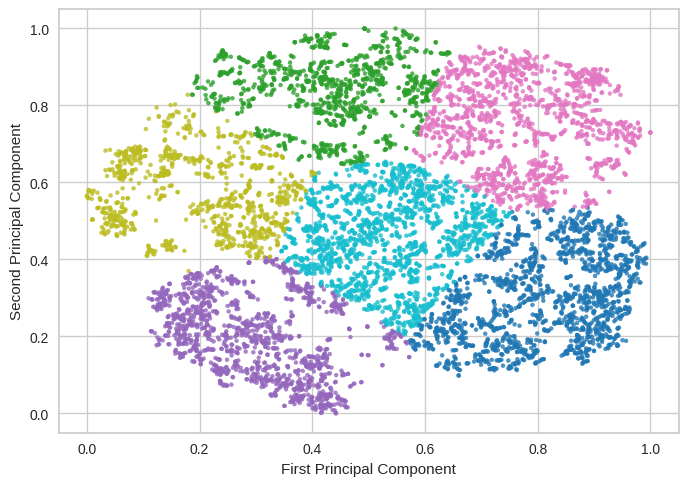

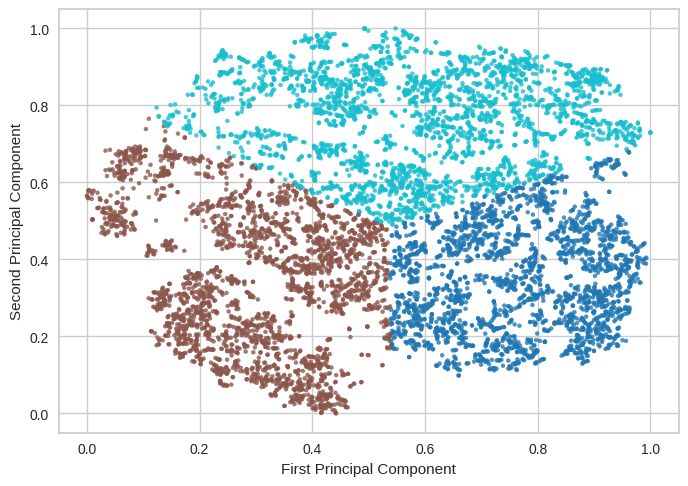

In [108]:
# cluster
clustering.plot_clustering(reg_points_red, clustering.perform_kmeans(reg_points_red, 6), 'K means')
clustering.plot_clustering(reg_points_red, clustering.perform_minibatch(reg_points_red, 3), 'MiniBatchKMeans')

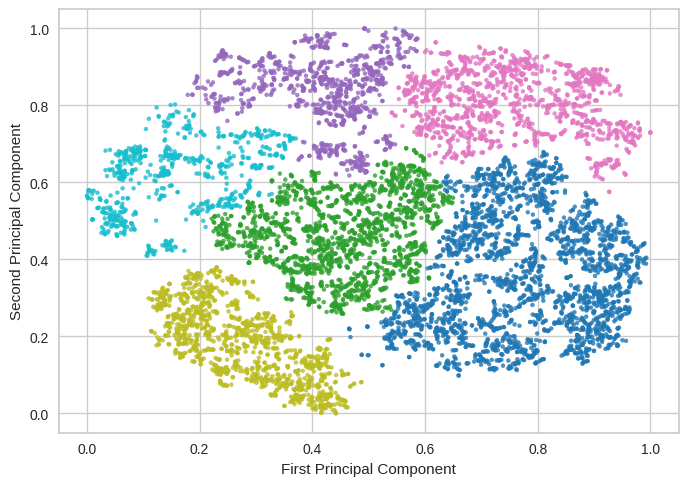

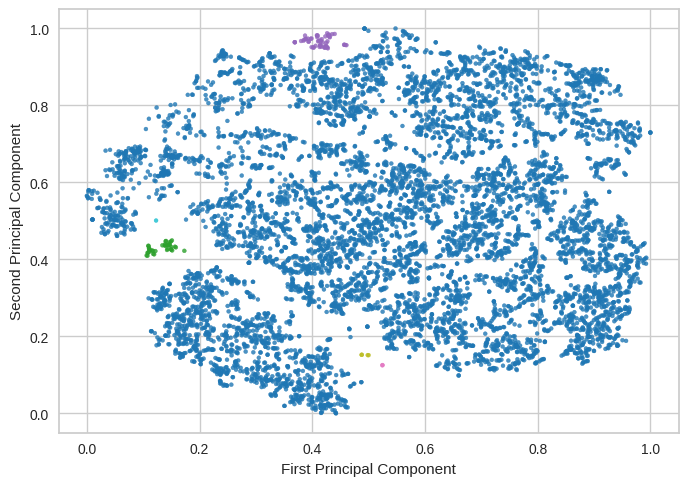

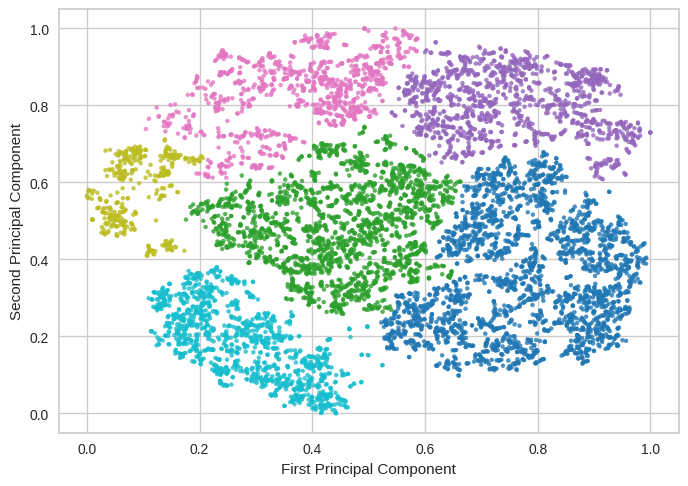

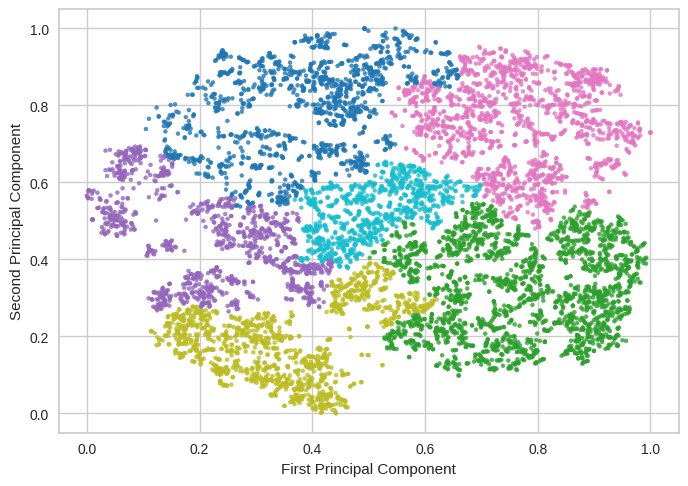

In [109]:
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'ward'), 'Hierarchical-ward')
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'single'), 'Hierarchical-single')
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'average'), 'Hierarchical-average')
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'complete'), 'Hierarchical-complete')

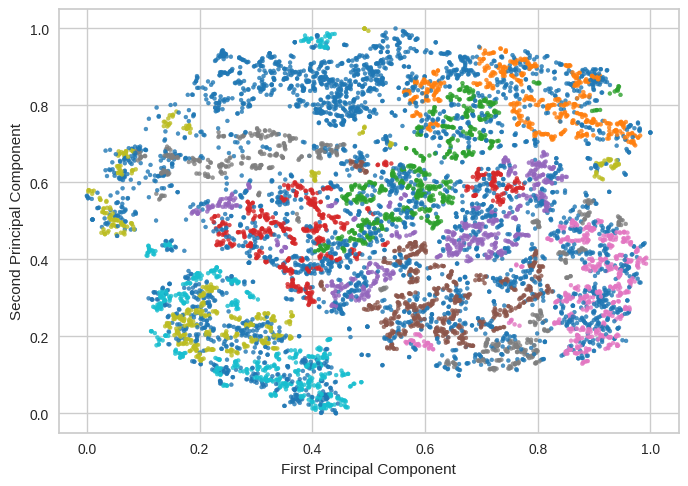

In [92]:
clustering.plot_clustering(reg_points_red, clustering.perform_optics(reg_points_red), 'OPTICS')

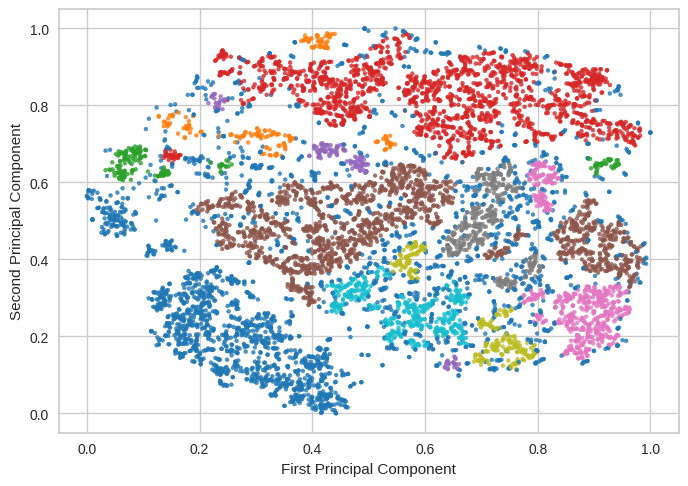

In [93]:
clustering.plot_clustering(reg_points_red, clustering.perform_hdbscan(reg_points_red), 'HDBSCAN')

In [38]:
algorithm_nmi_dictionary = {}

In [39]:
algorithm_nmi_dictionary['HDBSCAN'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=_, method='HDBSCAN')

In [40]:
algorithm_nmi_dictionary['OPTICS'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=_, method='OPTICS')

In [70]:
algorithm_nmi_dictionary['KMeansMiniBatch'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=3, method='KMeansMiniBatch')

In [71]:
algorithm_nmi_dictionary['KMeans'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=6, method='K Means')

In [72]:
algorithm_nmi_dictionary['Hierarchical'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=6, method='Hierarchical')

In [47]:
algorithm_nmi_dictionary['HDBSCAN_FULL'] = fit_to_external_classification.nmi_score(
        labels, reg_points, n_clusters=_, method='HDBSCAN')

In [48]:
algorithm_nmi_dictionary['OPTICS_FULL'] = fit_to_external_classification.nmi_score(
        labels, reg_points, n_clusters=_, method='OPTICS')

In [73]:
algorithm_nmi_dictionary['KMeansMiniBatch_FULL'] = fit_to_external_classification.nmi_score(
        labels, reg_points, n_clusters=3, method='KMeansMiniBatch')

In [74]:
algorithm_nmi_dictionary['KMeans_FULL'] = fit_to_external_classification.nmi_score(
        labels, reg_points, n_clusters=6, method='K Means')

In [75]:
algorithm_nmi_dictionary['Hierarchical_FULL'] = fit_to_external_classification.nmi_score(
        labels, reg_points, n_clusters=6, method='Hierarchical')

In [80]:
print('u test')
for key1 in algorithm_nmi_dictionary:
    for key2 in algorithm_nmi_dictionary:
        if key1 != key2:
            p_val = fit_to_external_classification.u_test(algorithm_nmi_dictionary[key1], 
                                                          algorithm_nmi_dictionary[key2])
            if p_val < 0.05:
                print(key1, 'is significantly better than ', key2, 'with p-value =', p_val, ' <<0.05')
                

u test
HDBSCAN is significantly better than  KMeansMiniBatch with p-value = 4.003272516972358e-09  <<0.05
HDBSCAN is significantly better than  KMeans with p-value = 3.98130104726256e-09  <<0.05
HDBSCAN is significantly better than  Hierarchical with p-value = 2.341341179371028e-10  <<0.05
HDBSCAN is significantly better than  HDBSCAN_FULL with p-value = 2.341341179371028e-10  <<0.05
HDBSCAN is significantly better than  OPTICS_FULL with p-value = 2.341341179371028e-10  <<0.05
HDBSCAN is significantly better than  KMeansMiniBatch_FULL with p-value = 1.9963213705518793e-06  <<0.05
HDBSCAN is significantly better than  KMeans_FULL with p-value = 4.003272516972358e-09  <<0.05
OPTICS is significantly better than  HDBSCAN with p-value = 2.341341179371028e-10  <<0.05
OPTICS is significantly better than  KMeansMiniBatch with p-value = 4.003272516972358e-09  <<0.05
OPTICS is significantly better than  KMeans with p-value = 3.98130104726256e-09  <<0.05
OPTICS is significantly better than  Hiera

In [81]:
print('Average NMI Scores:')
for key in algorithm_nmi_dictionary:
    print('for', key, 'the average NMI Score is ', sum(algorithm_nmi_dictionary[key]) / len(algorithm_nmi_dictionary[key]))

Average NMI Scores:
for HDBSCAN the average NMI Score is  0.10516191924817746
for OPTICS the average NMI Score is  0.1774507207132938
for KMeansMiniBatch the average NMI Score is  0.05484215438170896
for KMeans the average NMI Score is  0.08528966193363109
for Hierarchical the average NMI Score is  0.09012718387586457
for HDBSCAN_FULL the average NMI Score is  0.09187285549265284
for OPTICS_FULL the average NMI Score is  0.08308660471279998
for KMeansMiniBatch_FULL the average NMI Score is  0.08588743311675984
for KMeans_FULL the average NMI Score is  0.09995508320549285
for Hierarchical_FULL the average NMI Score is  0.10744488263671584


In [95]:
algorithm_silhouette_dictionary = {}

In [96]:
algorithm_silhouette_dictionary['HDBSCAN'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red, 'HDBSCAN')                                                                                           

In [97]:
algorithm_silhouette_dictionary['OPTICS'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red, 'OPTICS')

In [98]:
methods_nclusters = [['K means', 6], ['MiniBatchKMeans', 3]]
for method, n_clusters in methods_nclusters:
    algorithm_silhouette_dictionary[method] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red, method, n_clusters)

In [115]:
linkages = ['ward', 'average', 'complete', 'single']
for linkage in linkages:
    algorithm_silhouette_dictionary['Hierarchical' + linkage] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red,
                                                                                                                        'Hierarchical',
                                                                                                                        n_clusters=6,
                                                                                                                        linkage=linkage)

In [100]:
algorithm_silhouette_dictionary['HDBSCAN_FULL'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points, 'HDBSCAN')                                                                                           

In [101]:
algorithm_silhouette_dictionary['OPTICS_FULL'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points, 'OPTICS')

In [102]:
methods_nclusters = [['K means_FULL', 6], ['MiniBatchKMeans_FULL', 3]]
for method, n_clusters in methods_nclusters:
    algorithm_silhouette_dictionary[method] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points, method, n_clusters)

In [116]:
linkages = ['ward', 'average', 'complete', 'single']
for linkage in linkages:
    algorithm_silhouette_dictionary['Hierarchical' + linkage + '_FULL'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points,
                                                                                                                                  'Hierarchical',
                                                                                                                                  n_clusters=6,
                                                                                                                                  linkage=linkage)

In [118]:
print('u test')
for key1 in algorithm_silhouette_dictionary:
     for key2 in algorithm_silhouette_dictionary:
        if key1 != key2:
            pvalue = fit_to_external_classification.u_test(algorithm_silhouette_dictionary[key1],
                                                            algorithm_silhouette_dictionary[key2])
            if pvalue < 0.05:
                print(key1, 'is significantly better than', key2, 'with p-value =', pvalue, ' <<0.05')

u test
HDBSCAN is significantly better than Hierarchicalsingle with p-value = 2.341341179371028e-10  <<0.05
HDBSCAN is significantly better than HDBSCAN_FULL with p-value = 2.341341179371028e-10  <<0.05
HDBSCAN is significantly better than OPTICS_FULL with p-value = 2.341341179371028e-10  <<0.05
HDBSCAN is significantly better than Hierarchicalsingle_FULL with p-value = 2.341341179371028e-10  <<0.05
OPTICS is significantly better than HDBSCAN with p-value = 2.341341179371028e-10  <<0.05
OPTICS is significantly better than Hierarchicalsingle with p-value = 2.341341179371028e-10  <<0.05
OPTICS is significantly better than HDBSCAN_FULL with p-value = 2.341341179371028e-10  <<0.05
OPTICS is significantly better than OPTICS_FULL with p-value = 2.341341179371028e-10  <<0.05
OPTICS is significantly better than Hierarchicalsingle_FULL with p-value = 2.341341179371028e-10  <<0.05
K means is significantly better than HDBSCAN with p-value = 3.988612987274588e-09  <<0.05
K means is significantly b

In [119]:
print('Average Silhouette Scores:') 
dic = {k: sum(v)/len(v) for k, v in sorted(algorithm_silhouette_dictionary.items(), key=lambda item: sum(item[1]))}
for key in dic:
    print('for', key, 'the average Silhouette Score is ', dic[key])

Average Silhouette Scores:
for OPTICS_FULL the average Silhouette Score is  -0.5291467979809911
for Hierarchicalsingle the average Silhouette Score is  -0.32017601499779597
for HDBSCAN_FULL the average Silhouette Score is  -0.26641050404725414
for Hierarchicalsingle_FULL the average Silhouette Score is  -0.13334724430019043
for HDBSCAN the average Silhouette Score is  -0.018238554158043704
for OPTICS the average Silhouette Score is  0.02823375704389075
for Hierarchicalcomplete_FULL the average Silhouette Score is  0.08285833421072313
for Hierarchicalaverage_FULL the average Silhouette Score is  0.15069519586891747
for Hierarchicalward_FULL the average Silhouette Score is  0.1603969371855829
for MiniBatchKMeans_FULL the average Silhouette Score is  0.1655676105934448
for K means_FULL the average Silhouette Score is  0.22387181420957067
for Hierarchicalcomplete the average Silhouette Score is  0.3190009227267251
for Hierarchicalward the average Silhouette Score is  0.3805656024927597
for

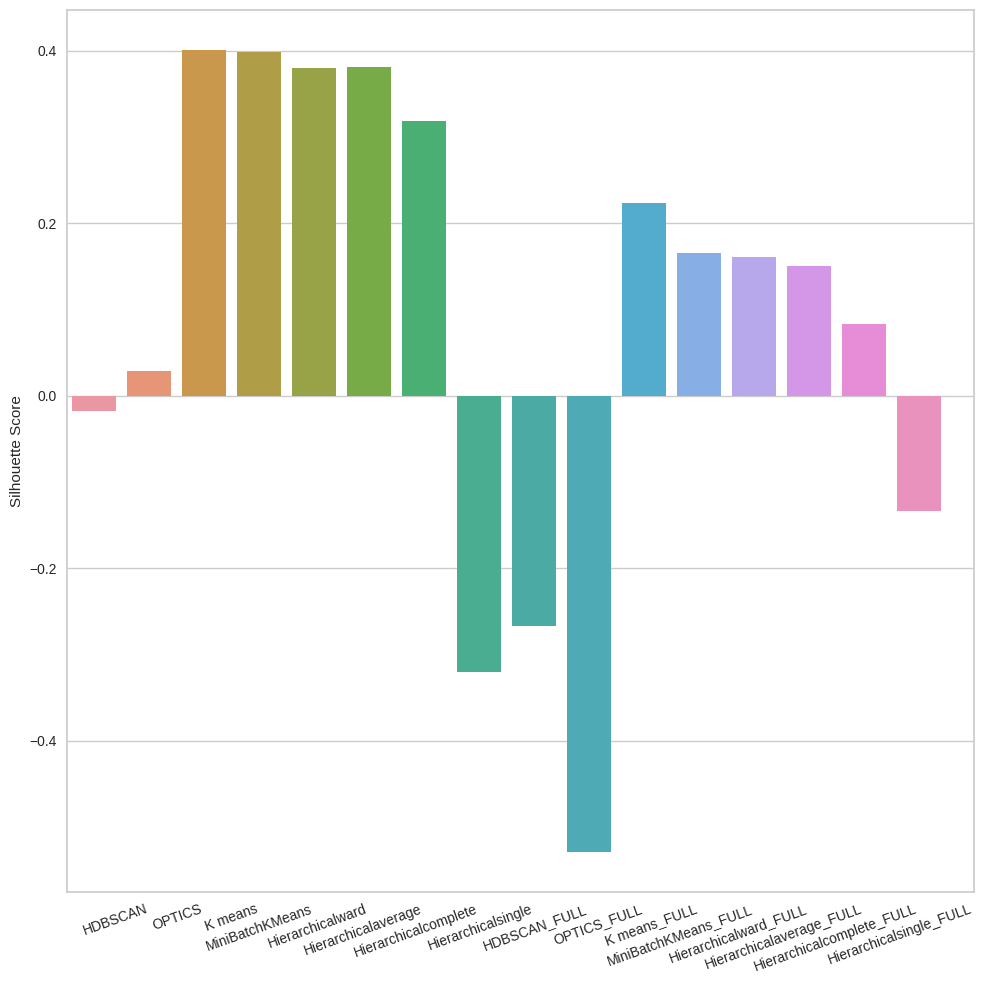

In [121]:
labels, data = [*zip(*algorithm_silhouette_dictionary.items())]

plt.figure(figsize=(10, 10))
sns.barplot(data=data)
plt.ylabel('Silhouette Score')
plt.xticks(range(1, len(labels) + 1), labels, rotation=20, ha='right')
plt.tight_layout()
plt.savefig('barplot2.png')
plt.show()

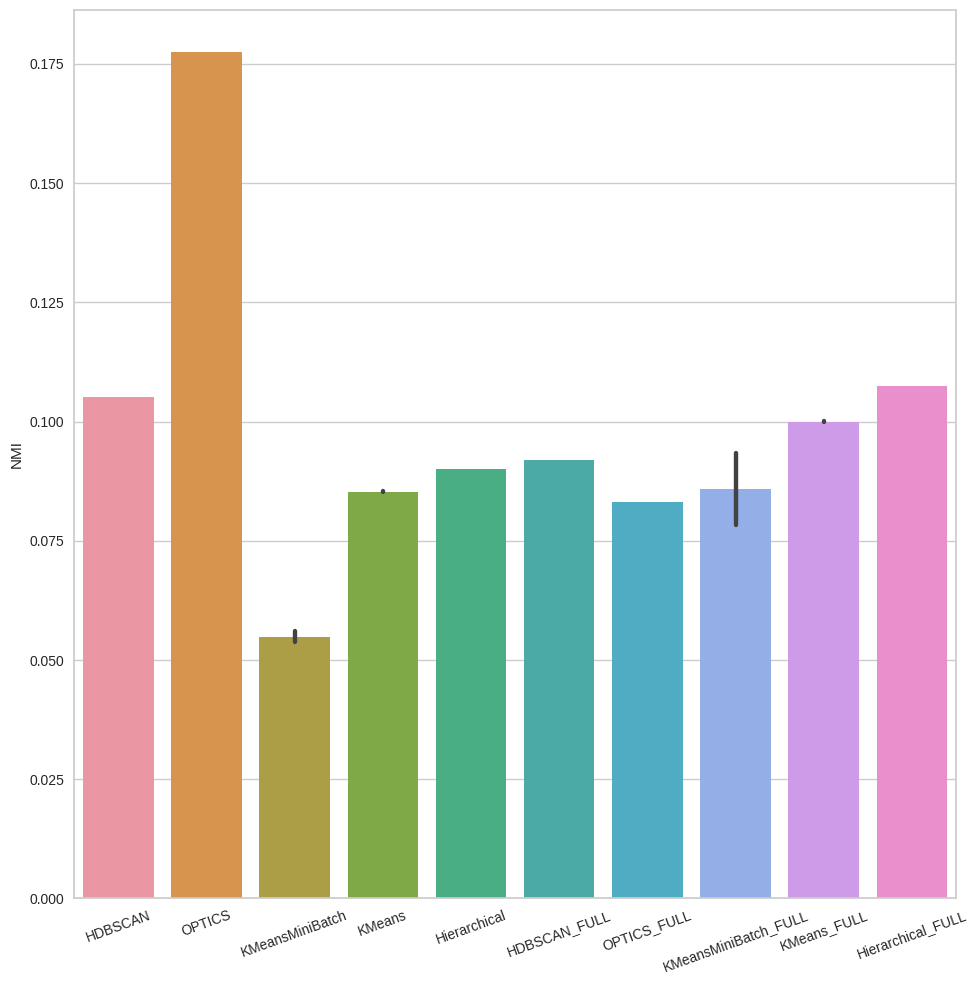

In [123]:
labels, data = [*zip(*algorithm_nmi_dictionary.items())]

plt.figure(figsize=(10, 10))
sns.barplot(data=data)
plt.ylabel('NMI')
plt.xticks(range(0, len(labels)), labels, rotation=20, ha='center')
plt.tight_layout()
plt.savefig('barplot2.png')
plt.show()